# Healthy Life Expectancy Capstone Project

Import Labraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
plt.style.use('dark_background')
sns.color_palette("YlOrBr", as_cmap=True)

%matplotlib inline

Read data

In [2]:
# Some of tables edited and organzied by excel sheet too.
# Data year range = 2000 - 2016
# Looking BMI for adults 18+
## looking life expectancy and healthy expectancy at birth(years)

In [3]:
#Table #1 - healthy life expectancy at birth 

In [4]:
healthy_life_atbirth = pd.read_csv('../data/healthy life expectancy at birth.csv')
healthy_life_atbirth

measure_name  location_id location_name  sex_id  \
0      HALE (Healthy life expectancy)           18      Thailand       1   
1      HALE (Healthy life expectancy)           18      Thailand       2   
2      HALE (Healthy life expectancy)           18      Thailand       3   
3      HALE (Healthy life expectancy)           18      Thailand       1   
4      HALE (Healthy life expectancy)           18      Thailand       2   
...                               ...          ...           ...     ...   
18355  HALE (Healthy life expectancy)          413       Tokelau       2   
18356  HALE (Healthy life expectancy)          413       Tokelau       3   
18357  HALE (Healthy life expectancy)          413       Tokelau       1   
18358  HALE (Healthy life expectancy)          413       Tokelau       2   
18359  HALE (Healthy life expectancy)          413       Tokelau       3   

      sex_name  age_id  age_name  metric_id metric_name  year        val  \
0         Male      22  All ages          5       Years  1990  59.937501   
1       Female      22  All ages          5       Years  1990  64.663367   
2         Both      22  All ages          5       Years  1990  62.246748   
3         Male      22  All ages          5       Years  1991  59.859536   
4       Female      22  All ages          5       Years  1991  64.730860   
...        ...     ...       ...        ...         ...   ...        ...   
18355   Female      22  All ages          5       Years  2018  61.528674   
18356     Both      22  All ages          5       Years  2018  63.099378   
18357     Male      22  All ages          5       Years  2019  64.862525   
18358   Female      22  All ages          5       Years  2019  61.583070   
18359     Both      22  All ages          5       Years  2019  63.167570   

           upper      lower  
0      62.237697  57.466585  
1      67.492676  61.662370  
2      64.700689  59.604041  
3      62.277379  57.406544  
4      67.499667  61.633864  
...          ...        ...  
18355  64.948376  57.846575  
18356  66.269622  59.653518  
18357  67.752913  61.546398  
18358  64.911549  57.932384  
18359  66.301957  59.785674  

[18360 rows x 13 columns]

In [5]:
healthy_life_atbirth.shape

(18360, 13)

In [6]:
healthy_life_atbirth.columns

Index(['measure_name', 'location_id', 'location_name', 'sex_id', 'sex_name',
       'age_id', 'age_name', 'metric_id', 'metric_name', 'year', 'val',
       'upper', 'lower'],
      dtype='object')

In [7]:
#Drop unnecessory columns

In [8]:
healthy_life_atbirth = healthy_life_atbirth.drop(columns = {'location_id','sex_id','age_id', 'age_name','measure_name',
                                                            'metric_id','metric_name','upper', 'lower'})
healthy_life_atbirth

location_name sex_name  year        val
0          Thailand     Male  1990  59.937501
1          Thailand   Female  1990  64.663367
2          Thailand     Both  1990  62.246748
3          Thailand     Male  1991  59.859536
4          Thailand   Female  1991  64.730860
...             ...      ...   ...        ...
18355       Tokelau   Female  2018  61.528674
18356       Tokelau     Both  2018  63.099378
18357       Tokelau     Male  2019  64.862525
18358       Tokelau   Female  2019  61.583070
18359       Tokelau     Both  2019  63.167570

[18360 rows x 4 columns]

In [9]:
# Rename columns

In [10]:
healthy_life_atbirth = healthy_life_atbirth.rename(columns = {'location_name':'country','sex_name':'sex',
                                                              'year':'year','val':'healthy_life_expectancy'})
healthy_life_atbirth.head()

country     sex  year  healthy_life_expectancy
0  Thailand    Male  1990                59.937501
1  Thailand  Female  1990                64.663367
2  Thailand    Both  1990                62.246748
3  Thailand    Male  1991                59.859536
4  Thailand  Female  1991                64.730860

In [11]:
healthy_life_atbirth.dtypes

country                     object
sex                         object
year                         int64
healthy_life_expectancy    float64
dtype: object

In [12]:
# select years from 2000 - 2016
healthy_life_atbirth = healthy_life_atbirth.loc[((healthy_life_atbirth['year'] >=2000)&
                                                 (healthy_life_atbirth['year'] <=2016))]
healthy_life_atbirth

country     sex  year  healthy_life_expectancy
30     Thailand    Male  2000                60.063539
31     Thailand  Female  2000                65.638144
32     Thailand    Both  2000                62.789851
33     Thailand    Male  2001                60.992674
34     Thailand  Female  2001                66.258605
...         ...     ...   ...                      ...
18346   Tokelau  Female  2015                61.392416
18347   Tokelau    Both  2015                62.896515
18348   Tokelau    Male  2016                64.633006
18349   Tokelau  Female  2016                61.437418
18350   Tokelau    Both  2016                62.957603

[10404 rows x 4 columns]

In [13]:
#Table #2 life expectancy in birth

In [14]:
life_atbirth = pd.read_csv('../data/life expectancy at birth.csv')
life_atbirth.head()

measure_name  location_id location_name  sex_id sex_name  age_id  \
0  Life expectancy          108        Belize       1     Male      28   
1  Life expectancy          108        Belize       2   Female      28   
2  Life expectancy          108        Belize       3     Both      28   
3  Life expectancy          108        Belize       1     Male      28   
4  Life expectancy          108        Belize       2   Female      28   

  age_name  metric_id metric_name  year        val      upper      lower  
0  <1 year          5       Years  1990  71.419588  72.386348  70.436736  
1  <1 year          5       Years  1990  74.271354  75.161137  73.398882  
2  <1 year          5       Years  1990  72.786815  73.564076  72.025239  
3  <1 year          5       Years  1991  71.154589  72.066771  70.153802  
4  <1 year          5       Years  1991  75.180307  76.049136  74.336177

In [15]:
life_atbirth.shape

(18360, 13)

In [16]:
life_atbirth.columns

Index(['measure_name', 'location_id', 'location_name', 'sex_id', 'sex_name',
       'age_id', 'age_name', 'metric_id', 'metric_name', 'year', 'val',
       'upper', 'lower'],
      dtype='object')

In [17]:
#drop unnecessory columns

In [18]:
life_atbirth = life_atbirth.drop(columns = {'location_id','measure_name','sex_id','age_id', 
                                            'age_name', 'metric_id','upper', 'lower','metric_name'})
life_atbirth.head()

location_name sex_name  year        val
0        Belize     Male  1990  71.419588
1        Belize   Female  1990  74.271354
2        Belize     Both  1990  72.786815
3        Belize     Male  1991  71.154589
4        Belize   Female  1991  75.180307

In [19]:
#rename columns

In [20]:
life_atbirth = life_atbirth.rename(columns = {'location_name':'country','sex_name':'sex',
                                                              'year':'year','val':'life_expectancy'})
life_atbirth.head()

country     sex  year  life_expectancy
0  Belize    Male  1990        71.419588
1  Belize  Female  1990        74.271354
2  Belize    Both  1990        72.786815
3  Belize    Male  1991        71.154589
4  Belize  Female  1991        75.180307

In [21]:
life_atbirth = life_atbirth.loc[(life_atbirth['year'] >=2000)&(life_atbirth['year']<=2016)]
life_atbirth.head()

country     sex  year  life_expectancy
30  Belize    Male  2000        66.845807
31  Belize  Female  2000        73.764796
32  Belize    Both  2000        69.981361
33  Belize    Male  2001        67.559667
34  Belize  Female  2001        74.159440

In [22]:
#Table #3 income groups

In [23]:
incomegroup = pd.read_csv('../data/incomegroup.csv')
incomegroup.tail()

country classification
199  Turks and Caicos Islands    High-income
200      United Arab Emirates    High-income
201            United Kingdom    High-income
202             United States    High-income
203                   Uruguay    High-income

In [24]:
incomegroup = incomegroup.rename(columns = {'classification':'incomegroup'})
incomegroup.head(1)

country incomegroup
0  Afghanistan  Low-income

In [25]:
incomegroup.shape

(204, 2)

In [26]:
# Table #4 Body mass index

In [27]:
# data took on Adults only.
bmi = pd.read_csv('../data/bmi_age_standardised_country.csv')
bmi

YEAR (DISPLAY)       REGION (DISPLAY) COUNTRY (DISPLAY) SEX (DISPLAY)  \
0                1979  Eastern Mediterranean    Sudan (former)          Male   
1                1985  Eastern Mediterranean    Sudan (former)          Male   
2                1987  Eastern Mediterranean    Sudan (former)          Male   
3                1995  Eastern Mediterranean    Sudan (former)          Male   
4                1996  Eastern Mediterranean    Sudan (former)          Male   
...               ...                    ...               ...           ...   
24645            2012  Eastern Mediterranean             Sudan          Male   
24646            2013  Eastern Mediterranean             Sudan          Male   
24647            2014  Eastern Mediterranean             Sudan          Male   
24648            2015  Eastern Mediterranean             Sudan          Male   
24649            2016  Eastern Mediterranean             Sudan          Male   

       Numeric  
0         21.1  
1         21.5  
2         21.7  
3         22.3  
4         22.4  
...        ...  
24645      NaN  
24646      NaN  
24647      NaN  
24648      NaN  
24649      NaN  

[24650 rows x 5 columns]

In [28]:
# rename columns
bmi = bmi.rename(columns = {'COUNTRY (DISPLAY)':'country','REGION (DISPLAY)':'region',
                            'YEAR (DISPLAY)':'year','SEX (DISPLAY)':'sex','Numeric':'BMI'})
bmi.head()

year                 region         country   sex   BMI
0  1979  Eastern Mediterranean  Sudan (former)  Male  21.1
1  1985  Eastern Mediterranean  Sudan (former)  Male  21.5
2  1987  Eastern Mediterranean  Sudan (former)  Male  21.7
3  1995  Eastern Mediterranean  Sudan (former)  Male  22.3
4  1996  Eastern Mediterranean  Sudan (former)  Male  22.4

In [29]:
bmi = bmi.drop(columns ='sex')
bmi.head()

year                 region         country   BMI
0  1979  Eastern Mediterranean  Sudan (former)  21.1
1  1985  Eastern Mediterranean  Sudan (former)  21.5
2  1987  Eastern Mediterranean  Sudan (former)  21.7
3  1995  Eastern Mediterranean  Sudan (former)  22.3
4  1996  Eastern Mediterranean  Sudan (former)  22.4

In [30]:
# select years from 2000 - 2016
bmi = bmi.loc[((bmi['year'] >=2000)&(bmi['year']<=2016))]
bmi.head()

year                 region         country   BMI
5   2003  Eastern Mediterranean  Sudan (former)  22.9
6   2011  Eastern Mediterranean  Sudan (former)  23.4
15  2002  Eastern Mediterranean  Sudan (former)  22.8
16  2005  Eastern Mediterranean  Sudan (former)  23.1
17  2013  Eastern Mediterranean  Sudan (former)  23.5

In [31]:
# Table #5 GDP

In [32]:
# Countries and income groups are mixed. I took countries only
gdp = pd.read_csv('../data/gdp-per-capita-worldbank.csv')
gdp

Entity Code  Year  \
0     Afghanistan  AFG  2002   
1     Afghanistan  AFG  2003   
2     Afghanistan  AFG  2004   
3     Afghanistan  AFG  2005   
4     Afghanistan  AFG  2006   
...           ...  ...   ...   
6181     Zimbabwe  ZWE  2017   
6182     Zimbabwe  ZWE  2018   
6183     Zimbabwe  ZWE  2019   
6184     Zimbabwe  ZWE  2020   
6185     Zimbabwe  ZWE  2021   

      GDP per capita, PPP (constant 2017 international $)  
0                                             1280.4631    
1                                             1292.3335    
2                                             1260.0605    
3                                             1352.3207    
4                                             1366.9932    
...                                                 ...    
6181                                          2331.7808    
6182                                          2399.6216    
6183                                          2203.3967    
6184                                          1990.3195    
6185                                          2115.1445    

[6186 rows x 4 columns]

In [33]:
# rename columns
gdp = gdp.rename(columns = {'Entity':'entity','Year':'year','GDP per capita, PPP (constant 2017 international $)':'GDP_percapita'})
gdp.head()

entity Code  year  GDP_percapita
0  Afghanistan  AFG  2002      1280.4631
1  Afghanistan  AFG  2003      1292.3335
2  Afghanistan  AFG  2004      1260.0605
3  Afghanistan  AFG  2005      1352.3207
4  Afghanistan  AFG  2006      1366.9932

Combine table#1 healthy life  expectancy and table #2 life  expectancy

In [34]:
healthy = pd.merge(healthy_life_atbirth,life_atbirth, left_on = ['year','country','sex'],
                   right_on = ['year','country','sex'],
                  how = 'inner')
healthy.head(2)

country     sex  year  healthy_life_expectancy  life_expectancy
0  Thailand    Male  2000                60.063539        67.996728
1  Thailand  Female  2000                65.638144        75.782978

In [35]:
healthy.country.unique()

array(['Thailand', 'Timor-Leste', 'Viet Nam', 'Fiji', 'Mongolia',
       'Tajikistan', 'Turkmenistan', 'Uzbekistan', 'Estonia', 'Latvia',
       'Taiwan (Province of China)', 'Cambodia', 'Lithuania',
       'Republic of Moldova', 'Russian Federation', 'Denmark', 'Finland',
       'France', 'Germany', 'Greece', 'Indonesia',
       "Lao People's Democratic Republic", 'Solomon Islands', 'Tonga',
       'China', "Democratic People's Republic of Korea", 'Kiribati',
       'Marshall Islands', 'Sudan', 'Iceland', 'Uruguay', 'Canada',
       'Malaysia', 'Maldives', 'Myanmar', 'Vanuatu', 'Hungary',
       'Micronesia (Federated States of)', 'Papua New Guinea', 'Samoa',
       'Albania', 'United States of America', 'Trinidad and Tobago',
       'Bolivia (Plurinational State of)', 'North Macedonia',
       'Montenegro', 'Poland', 'Romania', 'Republic of Korea',
       'Philippines', 'Sri Lanka', 'Armenia', 'Azerbaijan', 'Ecuador',
       'Peru', 'Algeria', 'Bahrain', 'Bosnia and Herzegovina', 'Bu

Combine healthy and table #3 income group

In [36]:
health_income= pd.merge(healthy,incomegroup, left_on = ['country'],
                      right_on = ['country'],
                  how = 'left')
health_income.head()

country     sex  year  healthy_life_expectancy  life_expectancy  \
0  Thailand    Male  2000                60.063539        67.996728   
1  Thailand  Female  2000                65.638144        75.782978   
2  Thailand    Both  2000                62.789851        71.810507   
3  Thailand    Male  2001                60.992674        69.186321   
4  Thailand  Female  2001                66.258605        76.581611   

           incomegroup  
0  Upper-middle-income  
1  Upper-middle-income  
2  Upper-middle-income  
3  Upper-middle-income  
4  Upper-middle-income

Combine healthy_income and bmi (table #4)

In [37]:
health_income_bmi = pd.merge(health_income, bmi, left_on = ['year','country'],
                      right_on = ['year','country'],
                  how = 'left')
health_income_bmi

country     sex  year  healthy_life_expectancy  life_expectancy  \
0      Thailand    Male  2000                60.063539        67.996728   
1      Thailand    Male  2000                60.063539        67.996728   
2      Thailand    Male  2000                60.063539        67.996728   
3      Thailand  Female  2000                65.638144        75.782978   
4      Thailand  Female  2000                65.638144        75.782978   
...         ...     ...   ...                      ...              ...   
29779   Tokelau  Female  2015                61.392416        70.861232   
29780   Tokelau    Both  2015                62.896515        71.716174   
29781   Tokelau    Male  2016                64.633006        72.904048   
29782   Tokelau  Female  2016                61.437418        70.975185   
29783   Tokelau    Both  2016                62.957603        71.848978   

               incomegroup           region   BMI  
0      Upper-middle-income  South-East Asia  22.9  
1      Upper-middle-income  South-East Asia  23.5  
2      Upper-middle-income  South-East Asia  22.3  
3      Upper-middle-income  South-East Asia  22.9  
4      Upper-middle-income  South-East Asia  23.5  
...                    ...              ...   ...  
29779                  NaN              NaN   NaN  
29780                  NaN              NaN   NaN  
29781                  NaN              NaN   NaN  
29782                  NaN              NaN   NaN  
29783                  NaN              NaN   NaN  

[29784 rows x 8 columns]

Combine health_income_bmi and gdp (table #5)

In [38]:
combine = pd.merge(health_income_bmi, gdp, left_on = ['year','country'],
                      right_on = ['year','entity'],
                  how = 'left')
combine.head()

country     sex  year  healthy_life_expectancy  life_expectancy  \
0  Thailand    Male  2000                60.063539        67.996728   
1  Thailand    Male  2000                60.063539        67.996728   
2  Thailand    Male  2000                60.063539        67.996728   
3  Thailand  Female  2000                65.638144        75.782978   
4  Thailand  Female  2000                65.638144        75.782978   

           incomegroup           region   BMI    entity Code  GDP_percapita  
0  Upper-middle-income  South-East Asia  22.9  Thailand  THA      9791.8955  
1  Upper-middle-income  South-East Asia  23.5  Thailand  THA      9791.8955  
2  Upper-middle-income  South-East Asia  22.3  Thailand  THA      9791.8955  
3  Upper-middle-income  South-East Asia  22.9  Thailand  THA      9791.8955  
4  Upper-middle-income  South-East Asia  23.5  Thailand  THA      9791.8955

In [39]:
combine[combine['country'].isna()]

Empty DataFrame
Columns: [country, sex, year, healthy_life_expectancy, life_expectancy, incomegroup, region, BMI, entity, Code, GDP_percapita]
Index: []

In [40]:
combine.duplicated().any()

True

In [41]:
#drop all duplicates
combine =  combine.drop_duplicates()
combine.head()

country     sex  year  healthy_life_expectancy  life_expectancy  \
0  Thailand    Male  2000                60.063539        67.996728   
1  Thailand    Male  2000                60.063539        67.996728   
2  Thailand    Male  2000                60.063539        67.996728   
3  Thailand  Female  2000                65.638144        75.782978   
4  Thailand  Female  2000                65.638144        75.782978   

           incomegroup           region   BMI    entity Code  GDP_percapita  
0  Upper-middle-income  South-East Asia  22.9  Thailand  THA      9791.8955  
1  Upper-middle-income  South-East Asia  23.5  Thailand  THA      9791.8955  
2  Upper-middle-income  South-East Asia  22.3  Thailand  THA      9791.8955  
3  Upper-middle-income  South-East Asia  22.9  Thailand  THA      9791.8955  
4  Upper-middle-income  South-East Asia  23.5  Thailand  THA      9791.8955

In [42]:
combine.country.unique()

array(['Thailand', 'Timor-Leste', 'Viet Nam', 'Fiji', 'Mongolia',
       'Tajikistan', 'Turkmenistan', 'Uzbekistan', 'Estonia', 'Latvia',
       'Taiwan (Province of China)', 'Cambodia', 'Lithuania',
       'Republic of Moldova', 'Russian Federation', 'Denmark', 'Finland',
       'France', 'Germany', 'Greece', 'Indonesia',
       "Lao People's Democratic Republic", 'Solomon Islands', 'Tonga',
       'China', "Democratic People's Republic of Korea", 'Kiribati',
       'Marshall Islands', 'Sudan', 'Iceland', 'Uruguay', 'Canada',
       'Malaysia', 'Maldives', 'Myanmar', 'Vanuatu', 'Hungary',
       'Micronesia (Federated States of)', 'Papua New Guinea', 'Samoa',
       'Albania', 'United States of America', 'Trinidad and Tobago',
       'Bolivia (Plurinational State of)', 'North Macedonia',
       'Montenegro', 'Poland', 'Romania', 'Republic of Korea',
       'Philippines', 'Sri Lanka', 'Armenia', 'Azerbaijan', 'Ecuador',
       'Peru', 'Algeria', 'Bahrain', 'Bosnia and Herzegovina', 'Bu

# Data cleaning

In [43]:
#Identify missing/null values and checking datatypes

combine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28344 entries, 0 to 29783
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  28344 non-null  object 
 1   sex                      28344 non-null  object 
 2   year                     28344 non-null  int64  
 3   healthy_life_expectancy  28344 non-null  float64
 4   life_expectancy          28344 non-null  float64
 5   incomegroup              23490 non-null  object 
 6   region                   27630 non-null  object 
 7   BMI                      27426 non-null  float64
 8   entity                   24348 non-null  object 
 9   Code                     24348 non-null  object 
 10  GDP_percapita            24348 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 2.6+ MB


In [44]:
# All have the right format

Checking if there is any Outlier.

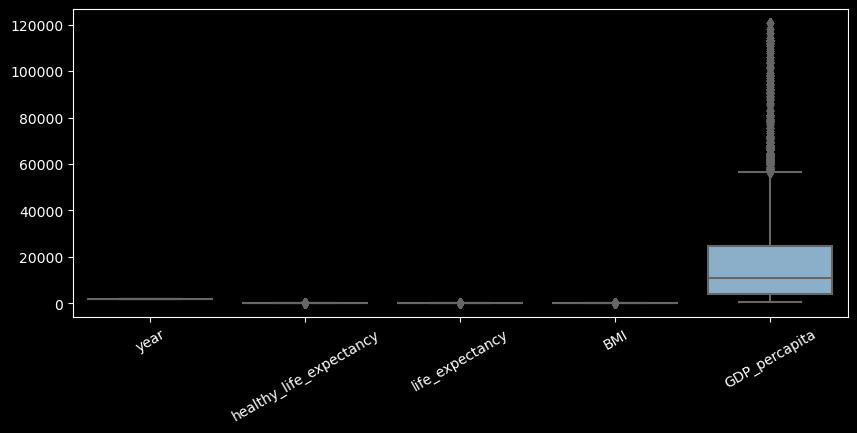

In [45]:
# Box plot can tell me whether I have an outlier or not

plt.figure(figsize = (10,4))
sns.boxplot(combine)
plt.xticks(rotation=30);

 So GDP_percapita has outlier, I use IQR method to look at all the outliers.

let it look at possible outlier excluding GDP_percapita

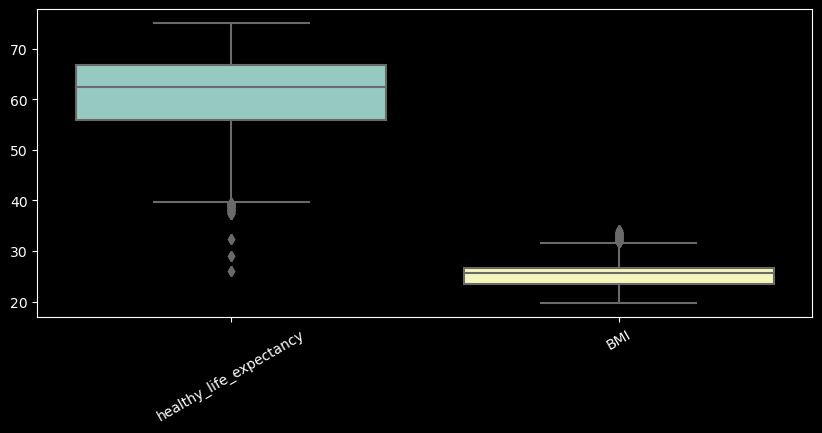

In [46]:
plt.figure(figsize = (10,4))
sns.boxplot(combine[['healthy_life_expectancy','BMI']])
plt.xticks(rotation=30);

In [47]:
combine_desc = combine.describe()
combine_desc

year  healthy_life_expectancy  life_expectancy           BMI  \
count  28344.000000             28344.000000     28344.000000  27426.000000   
mean    2007.996084                60.878767        69.783886     25.306640   
std        4.891204                 7.501601         8.987148      2.494244   
min     2000.000000                26.101234        28.827137     19.700000   
25%     2004.000000                55.846641        63.637455     23.400000   
50%     2008.000000                62.478099        71.283406     25.600000   
75%     2012.000000                66.684213        76.693234     26.700000   
max     2016.000000                75.020054        87.442214     34.100000   

       GDP_percapita  
count   24348.000000  
mean    18003.660466  
std     19762.916995  
min       628.693300  
25%      3824.197500  
50%     11058.950000  
75%     24844.034750  
max    120647.820000

In [48]:
#high_outlier = (Q3 + 1.5 IQR), IQR = 75% -25%, for GDP

high_outlier = combine_desc.loc['75%','GDP_percapita'] + 1.5*(combine_desc.loc['75%', 'GDP_percapita'] - combine_desc.loc['25%', 'GDP_percapita'])
high_outlier

56373.790624999994

In [49]:
all_high_outlier= combine.loc[combine['GDP_percapita']> high_outlier]
all_high_outlier

country     sex  year  healthy_life_expectancy  life_expectancy  \
9321    Singapore    Male  2003                69.600609        78.077315   
9322    Singapore    Male  2003                69.600609        78.077315   
9323    Singapore    Male  2003                69.600609        78.077315   
9324    Singapore  Female  2003                71.897910        82.594596   
9325    Singapore  Female  2003                71.897910        82.594596   
...           ...     ...   ...                      ...              ...   
29718  San Marino  Female  2015                71.371474        84.031957   
29721  San Marino    Both  2015                70.801855        81.965792   
29724  San Marino    Male  2016                70.265968        79.889395   
29727  San Marino  Female  2016                71.374055        84.072873   
29730  San Marino    Both  2016                70.788096        81.982971   

       incomegroup           region   BMI      entity Code  GDP_percapita  
9321   High-income  Western Pacific  23.5   Singapore  SGP      58819.957  
9322   High-income  Western Pacific  23.2   Singapore  SGP      58819.957  
9323   High-income  Western Pacific  23.7   Singapore  SGP      58819.957  
9324   High-income  Western Pacific  23.5   Singapore  SGP      58819.957  
9325   High-income  Western Pacific  23.2   Singapore  SGP      58819.957  
...            ...              ...   ...         ...  ...            ...  
29718  High-income           Europe   NaN  San Marino  SMR      57542.984  
29721  High-income           Europe   NaN  San Marino  SMR      57542.984  
29724  High-income           Europe   NaN  San Marino  SMR      58432.504  
29727  High-income           Europe   NaN  San Marino  SMR      58432.504  
29730  High-income           Europe   NaN  San Marino  SMR      58432.504  

[1164 rows x 11 columns]

In [50]:
print(len(all_high_outlier))

1164


In [51]:
# i keep all outliers of gdp per capita

In [52]:
#low_outlier = (Q3 - 1.5 IQR), IQR = 75% -25%, for GDP

low_outlier = combine_desc.loc['75%','GDP_percapita'] - 1.5*(combine_desc.loc['75%', 'GDP_percapita'] - combine_desc.loc['25%', 'GDP_percapita'])
low_outlier

-6685.721124999996

In [53]:
#low_outlier = (Q3 - 1.5 IQR), IQR = 75% -25%, for healthy_life expectancy
low_outlier = combine_desc.loc['75%','healthy_life_expectancy'] - 1.5*(combine_desc.loc['75%', 'healthy_life_expectancy'] - combine_desc.loc['25%', 'healthy_life_expectancy'])
low_outlier

50.4278554

In [54]:
combine.loc[combine['healthy_life_expectancy']<low_outlier].sort_values(by = 'healthy_life_expectancy')

country   sex  year  healthy_life_expectancy  life_expectancy  \
20954     Haiti  Male  2010                26.101234        28.827137   
20953     Haiti  Male  2010                26.101234        28.827137   
20952     Haiti  Male  2010                26.101234        28.827137   
20960     Haiti  Both  2010                28.983229        32.519585   
20959     Haiti  Both  2010                28.983229        32.519585   
...         ...   ...   ...                      ...              ...   
16486  Cameroon  Male  2011                50.418377        56.792414   
16487  Cameroon  Male  2011                50.418377        56.792414   
3811   Kiribati  Both  2002                50.419103        56.952500   
3812   Kiribati  Both  2002                50.419103        56.952500   
3810   Kiribati  Both  2002                50.419103        56.952500   

               incomegroup           region   BMI    entity Code  \
20954           Low-income         Americas  25.7     Haiti  HTI   
20953           Low-income         Americas  23.6     Haiti  HTI   
20952           Low-income         Americas  24.6     Haiti  HTI   
20960           Low-income         Americas  25.7     Haiti  HTI   
20959           Low-income         Americas  23.6     Haiti  HTI   
...                    ...              ...   ...       ...  ...   
16486  Lower-middle-income           Africa  24.7  Cameroon  CMR   
16487  Lower-middle-income           Africa  23.4  Cameroon  CMR   
3811   Lower-middle-income  Western Pacific  29.5  Kiribati  KIR   
3812   Lower-middle-income  Western Pacific  28.3  Kiribati  KIR   
3810   Lower-middle-income  Western Pacific  28.9  Kiribati  KIR   

       GDP_percapita  
20954      2932.2790  
20953      2932.2790  
20952      2932.2790  
20960      2932.2790  
20959      2932.2790  
...              ...  
16486      3314.8982  
16487      3314.8982  
3811       2028.5942  
3812       2028.5942  
3810       2028.5942  

[3103 rows x 11 columns]

In [55]:
# some countries by a specific year, their healthy life expectancy very low It is beacuse of either war, natural diseastors...

In [56]:
# drop all low outliers

In [57]:
combine = combine.loc[combine['healthy_life_expectancy'] > low_outlier]
combine.head()

country     sex  year  healthy_life_expectancy  life_expectancy  \
0  Thailand    Male  2000                60.063539        67.996728   
1  Thailand    Male  2000                60.063539        67.996728   
2  Thailand    Male  2000                60.063539        67.996728   
3  Thailand  Female  2000                65.638144        75.782978   
4  Thailand  Female  2000                65.638144        75.782978   

           incomegroup           region   BMI    entity Code  GDP_percapita  
0  Upper-middle-income  South-East Asia  22.9  Thailand  THA      9791.8955  
1  Upper-middle-income  South-East Asia  23.5  Thailand  THA      9791.8955  
2  Upper-middle-income  South-East Asia  22.3  Thailand  THA      9791.8955  
3  Upper-middle-income  South-East Asia  22.9  Thailand  THA      9791.8955  
4  Upper-middle-income  South-East Asia  23.5  Thailand  THA      9791.8955

# Exploratory Data Analysis (EDA)

Looking
 * The distribution of healthy life expectancy at birth years across the world.(by country and by income group)
 * Which country has the top healthy life expectancy and which one is the bottom. 
 * How does healthy life expectancy age change over time?
 * How many average years lost due to disease, injury or illiness?
 * How does healthy life expectancy correlate with bmi and gdp in different demographic groups such as gender, regions and income  groups across the world?overtime?

In [58]:
combine.describe()

year  healthy_life_expectancy  life_expectancy           BMI  \
count  25241.000000             25241.000000     25241.000000  24368.000000   
mean    2008.333386                62.689215        71.883449     25.626592   
std        4.884091                 5.634758         6.951045      2.377066   
min     2000.000000                50.438659        55.699098     19.800000   
25%     2004.000000                58.652007        66.827145     24.200000   
50%     2009.000000                63.516382        72.462487     25.800000   
75%     2013.000000                67.130234        77.313086     26.800000   
max     2016.000000                75.020054        87.442214     34.100000   

       GDP_percapita  
count   21615.000000  
mean    19886.807913  
std     20175.582677  
min       764.336600  
25%      5042.803000  
50%     12671.687000  
75%     28219.110000  
max    120647.820000

In [59]:
expectancy_country = combine.groupby('country')[['healthy_life_expectancy','life_expectancy']].mean().dropna().sort_values(by ='healthy_life_expectancy', ascending = False)
expectancy_country

healthy_life_expectancy  life_expectancy
country                                                  
Japan                          72.384884        83.005315
Singapore                      72.152795        82.005474
Iceland                        70.830790        82.198103
San Marino                     70.695962        81.774469
Andorra                        70.611240        81.792392
...                                  ...              ...
Solomon Islands                51.615914        58.007373
Somalia                        51.488220        59.329948
Sierra Leone                   51.481318        58.884098
Guinea                         51.375959        58.405792
Chad                           51.370313        59.013697

[202 rows x 2 columns]

Japan is the heighest healthy life expectancy at birth age and expectancy.
Chad has the lowest healthy life expectancy at birth age and life expectancy.

In [60]:
# Distribution of the average healthy life expectancy at birth age across the world.

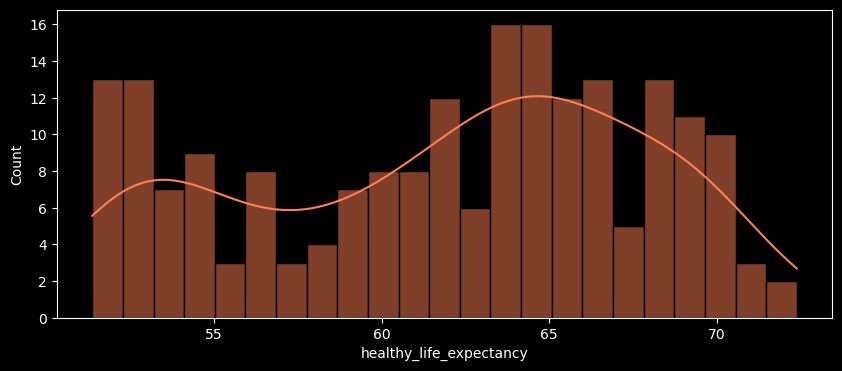

In [61]:
# kde stands for Kernel Density Estimation, is a method used to visualize the probability distribution.
plt.figure(figsize = (10,4))
sns.histplot(expectancy_country['healthy_life_expectancy'],kde = True, bins = 23, edgecolor='black', color = 'Coral')
plt.show()

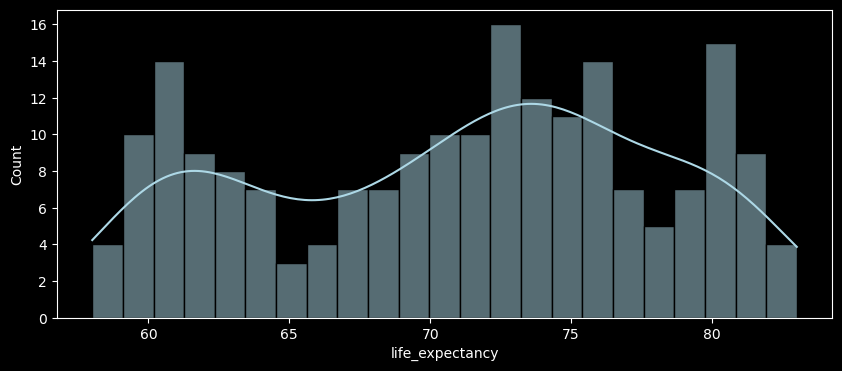

In [62]:
# Distribution of the average life expectancy at birth across the world.
plt.figure(figsize = (10,4))
sns.histplot(expectancy_country['life_expectancy'],kde = True, bins = 23, edgecolor='black', color = 'lightblue')
plt.show()

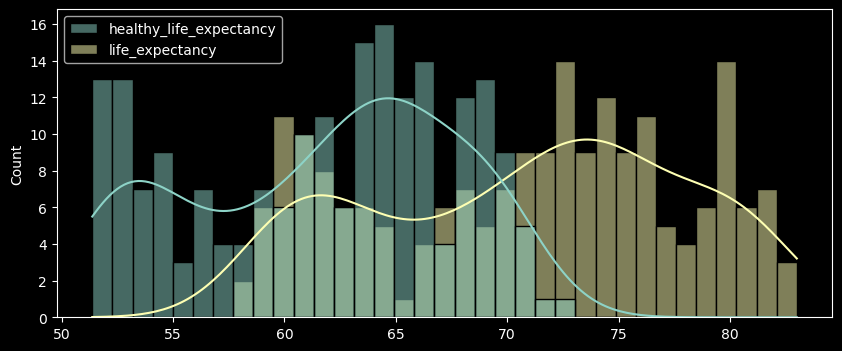

In [63]:
# Distribution of the average healthy life expectancy at birth and life_expectancy years.
plt.figure(figsize = (10,4))
sns.histplot(data = expectancy_country, bins = 35,
                            
                            edgecolor = 'black',kde = True);
# kde stands for Kernel Density Estimation,used to visualize the shape of distribution graph.


HALE at birth has slightly negatively skewed data (skewed to the left) with aunimodal distribution.Most of the individuals have higher at the range of 60-70.

Distribution of healthy life expectancy in different income groups

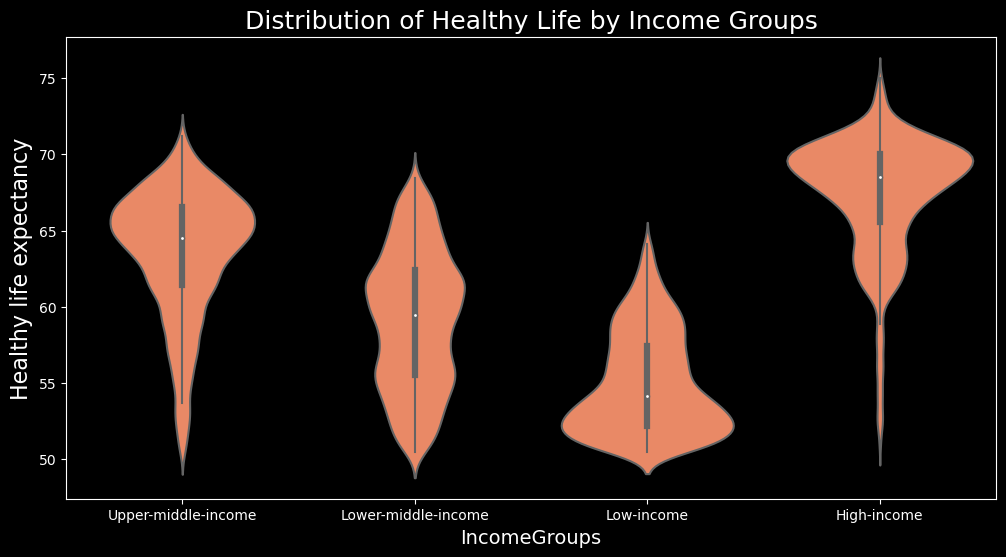

In [64]:
# Violin plot of healthy life expectancy by income groups

plt.figure(figsize = (12, 6))
sns.violinplot(data = combine, x = 'incomegroup', y = 'healthy_life_expectancy',color = 'Coral',fontsize = 14),
plt.xlabel('IncomeGroups',fontsize = 14)
plt.ylabel('Healthy life expectancy',fontsize = 16)
plt.title('Distribution of Healthy Life by Income Groups',fontsize = 18)
plt.show()

High income have high healthy life expectancy. Low income groups have high distibution of low health life expectancy.High dense individuals are concentrated on the median incomegroups.

In [65]:
# looking top 10 and bottom 10 countries

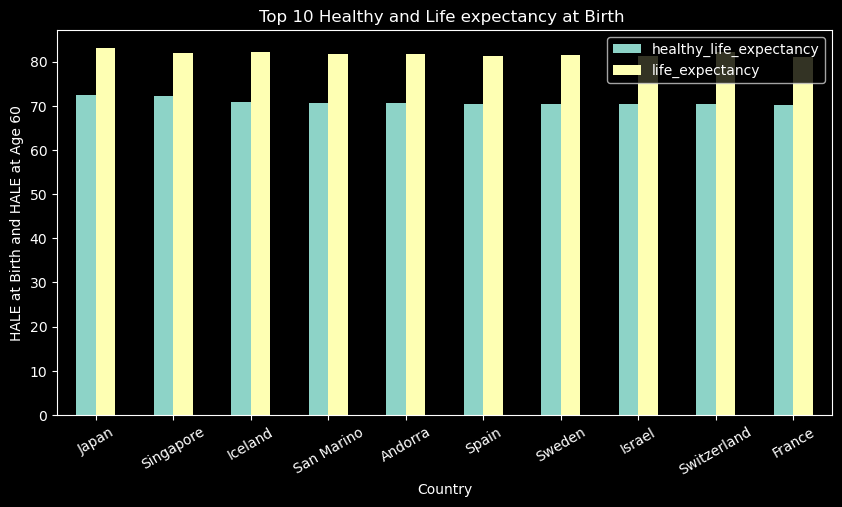

In [66]:
top10 = expectancy_country.head(10)
top10 = top10.plot(kind='bar', figsize=(10, 5))
top10.set_ylabel('HALE at Birth and HALE at Age 60')
top10.set_xlabel('Country')
plt.xticks(rotation=30)
plt.title('Top 10 Healthy and Life expectancy at Birth ')
plt.show()

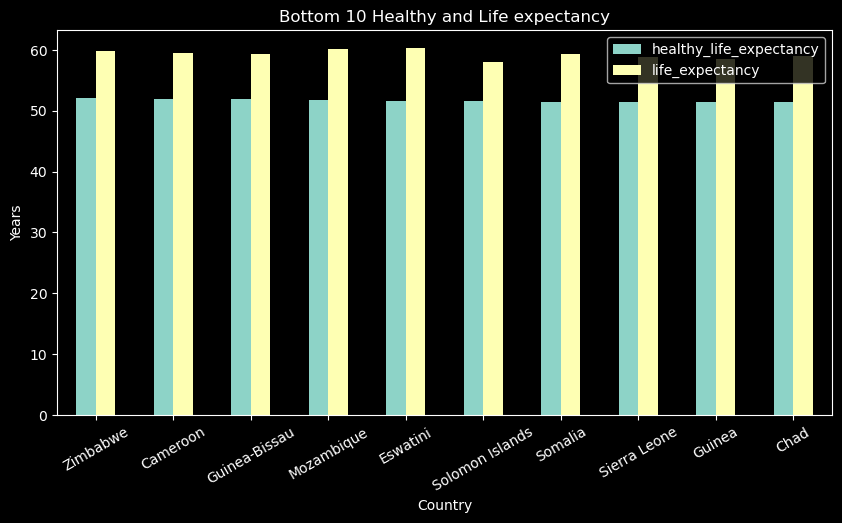

In [67]:
bottom10 = expectancy_country.tail(10)
bottom10 = bottom10.plot(kind='bar', figsize=(10, 5))
bottom10.set_ylabel('Years')
bottom10.set_xlabel('Country')
plt.xticks(rotation=30)
plt.title('Bottom 10 Healthy and Life expectancy')
plt.show()

Looking trends of life exepctancy and healthy life expectancy through time.

In [68]:
expectancy_year = combine.groupby('year')[['healthy_life_expectancy','life_expectancy']].mean()
expectancy_year

healthy_life_expectancy  life_expectancy
year                                          
2000                62.202379        71.228989
2001                62.302110        71.358339
2002                62.391390        71.466203
2003                62.520635        71.616566
2004                62.741121        71.891301
2005                62.752201        71.924069
2006                62.680305        71.864196
2007                62.681413        71.863580
2008                62.666627        71.846172
2009                62.616726        71.804258
2010                62.724210        71.942477
2011                62.736961        71.965164
2012                62.685998        71.924430
2013                62.783185        72.038931
2014                62.902943        72.196243
2015                62.971154        72.277353
2016                63.154680        72.513118

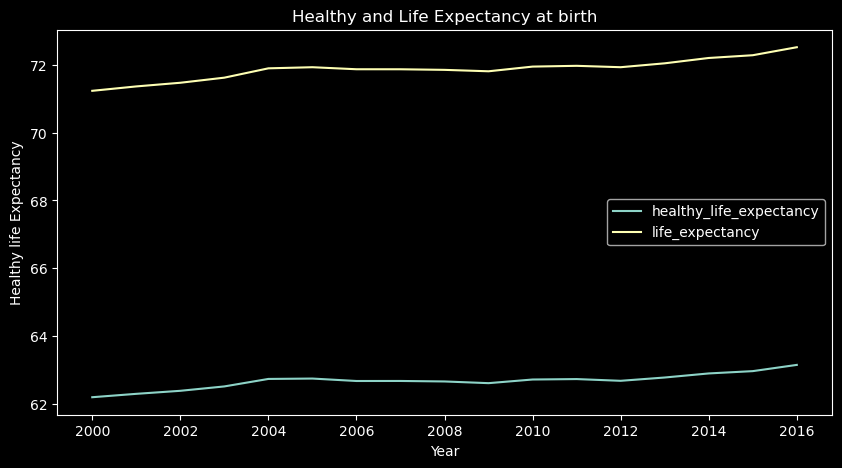

In [69]:
plt.figure(figsize=(10,5))

expectancy_year['healthy_life_expectancy'].plot(kind='line', legend=True)
expectancy_year['life_expectancy'].plot(kind='line', legend=True)
plt.title('Healthy and Life Expectancy at birth')
plt.xlabel('Year')
plt.ylabel('Healthy life Expectancy')
plt.show()

AS the year in progress, healthy and life expectancy are increasing.

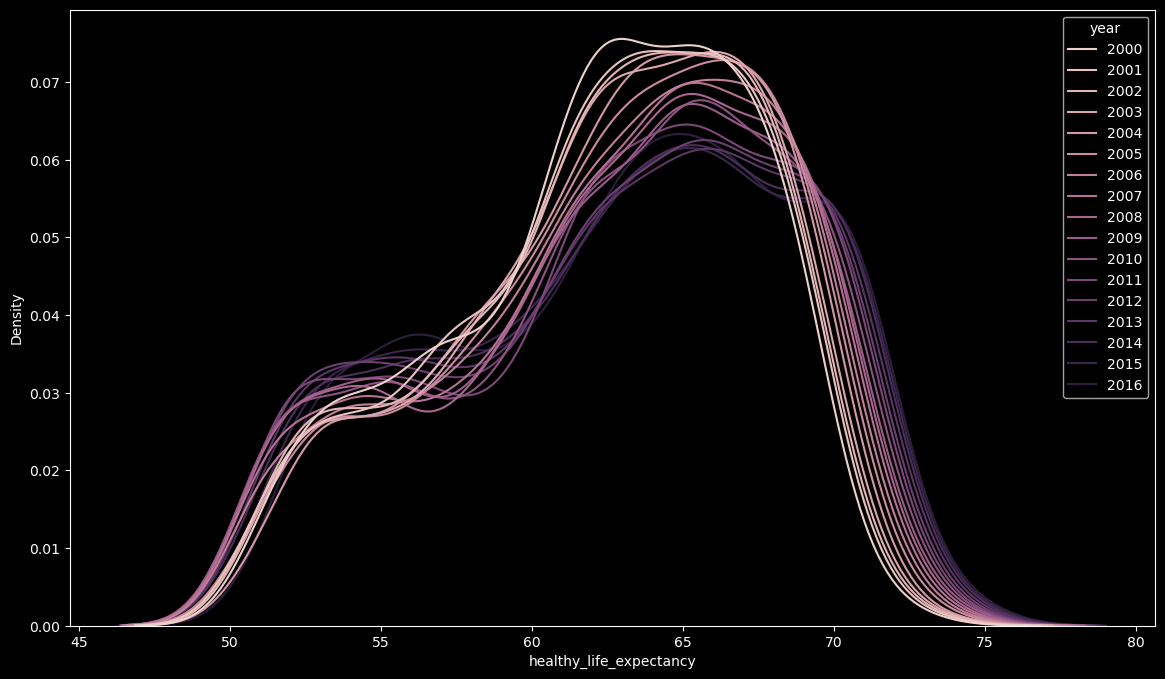

In [70]:
fig = plt.figure(figsize=(14, 8))
sns.kdeplot(data = combine,x= 'healthy_life_expectancy',hue = 'year', common_norm = False)
sns.color_palette("YlOrBr", as_cmap=True)
plt.show()

In [71]:
# A lot of people distribute to the right. A few people distribute to the left.
#the distribution of average health exepctancy is getteing higher when the year in progress.

In [72]:
combine[['healthy_life_expectancy', 'life_expectancy']].mean()

healthy_life_expectancy    62.689215
life_expectancy            71.883449
dtype: float64

In [73]:
# I create a new column called healthy year lose dueto disability,illness or any other factors.

In [74]:
year_lost = combine.groupby('country')[['healthy_life_expectancy','life_expectancy']].mean().dropna().sort_values(by ='healthy_life_expectancy', ascending = False)
year_lost

healthy_life_expectancy  life_expectancy
country                                                  
Japan                          72.384884        83.005315
Singapore                      72.152795        82.005474
Iceland                        70.830790        82.198103
San Marino                     70.695962        81.774469
Andorra                        70.611240        81.792392
...                                  ...              ...
Solomon Islands                51.615914        58.007373
Somalia                        51.488220        59.329948
Sierra Leone                   51.481318        58.884098
Guinea                         51.375959        58.405792
Chad                           51.370313        59.013697

[202 rows x 2 columns]

In [75]:
year_lost['healthy_year_lost'] = year_lost['life_expectancy'] - year_lost['healthy_life_expectancy']
year_lost.reset_index()

country  healthy_life_expectancy  life_expectancy  \
0              Japan                72.384884        83.005315   
1          Singapore                72.152795        82.005474   
2            Iceland                70.830790        82.198103   
3         San Marino                70.695962        81.774469   
4            Andorra                70.611240        81.792392   
..               ...                      ...              ...   
197  Solomon Islands                51.615914        58.007373   
198          Somalia                51.488220        59.329948   
199     Sierra Leone                51.481318        58.884098   
200           Guinea                51.375959        58.405792   
201             Chad                51.370313        59.013697   

     healthy_year_lost  
0            10.620431  
1             9.852679  
2            11.367314  
3            11.078507  
4            11.181153  
..                 ...  
197           6.391459  
198           7.841728  
199           7.402780  
200           7.029834  
201           7.643384  

[202 rows x 4 columns]

In [76]:
year_loss_through_lifespan = year_lost.healthy_year_lost.mean()
year_loss_through_lifespan

9.089367978445132

The average healthy year lose disability is 9.09 years. The higher life expectancy assocaited with the higher healthy year lose disability.

In [77]:
year_lost.describe()

healthy_life_expectancy  life_expectancy  healthy_year_lost
count               202.000000       202.000000         202.000000
mean                 61.821093        70.910461           9.089368
std                   5.901573         6.973940           1.234096
min                  51.370313        58.007373           6.391459
25%                  56.531542        64.462558           8.120016
50%                  63.293140        71.972627           8.962408
75%                  66.348466        75.905052           9.876121
max                  72.384884        83.005315          12.512520

In [78]:
# Healthy life expectancy by region

In [79]:
import plotly.express as px
px.choropleth(combine, locations="region",
              color="region",
              hover_name= "healthy_life_expectancy",
              animation_frame="year",
              range_color=[20,20])


How does healthy life expectancy correlate with bmi and gdp in different demographic groups such as gender, regions and income groups across the world?
What is the relationship between healthy life expectancy, bmi and gdp through time? 

In [80]:
combine.corr(numeric_only=True)

year  healthy_life_expectancy  life_expectancy  \
year                     1.000000                 0.034852         0.040486   
healthy_life_expectancy  0.034852                 1.000000         0.988409   
life_expectancy          0.040486                 0.988409         1.000000   
BMI                      0.062800                 0.307420         0.287032   
GDP_percapita            0.004863                 0.599901         0.605154   

                              BMI  GDP_percapita  
year                     0.062800       0.004863  
healthy_life_expectancy  0.307420       0.599901  
life_expectancy          0.287032       0.605154  
BMI                      1.000000       0.252898  
GDP_percapita            0.252898       1.000000

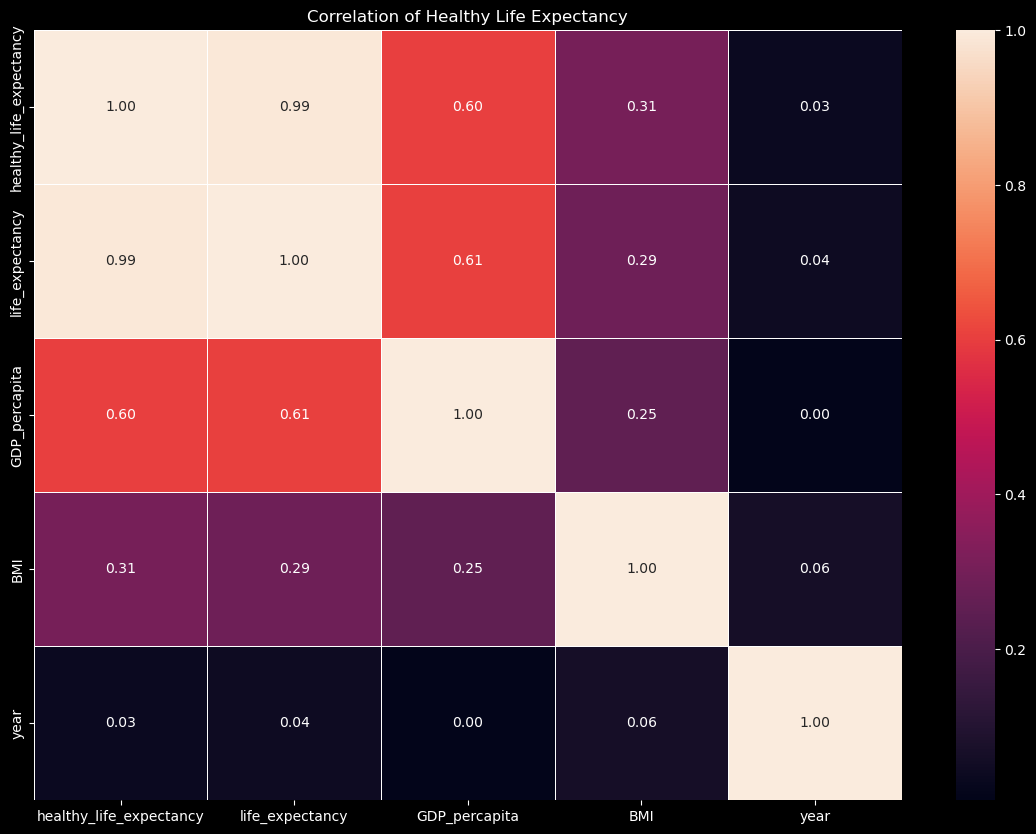

In [81]:
correlation = combine[['healthy_life_expectancy','life_expectancy','GDP_percapita','BMI','year']].corr()

# Create a heatmap
plt.figure(figsize=(14, 10)), sns.color_palette("YlOrBr", as_cmap=True)
sns.heatmap(correlation, annot=True,fmt='.2f', linewidths=0.5)
plt.title('Correlation of Healthy Life Expectancy')
plt.show()

From my correlation graph,all show a postive correlation with healthy and life expectancy.But I will look at closer with GDP per capita, bmi and healthy life expectancy.

Let me look at the distribution of BMI and GDP per capita deeper.

C:\Users\fozey\AppData\Local\Temp\ipykernel_58176\1520216713.py:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



Text(0.5, 1.0, 'GDP vs BMI')

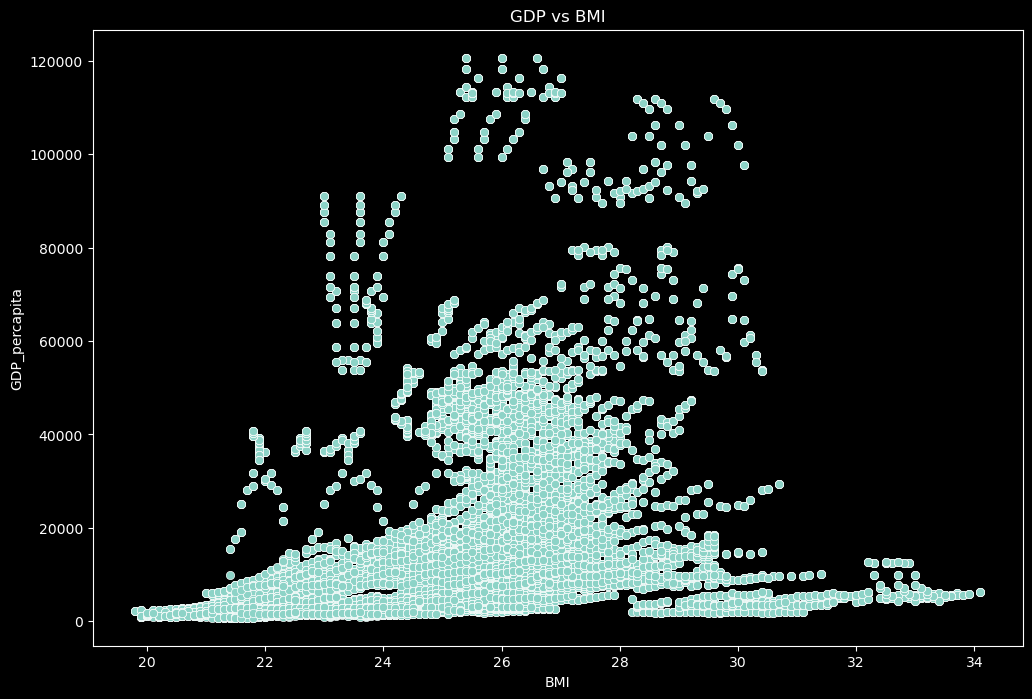

In [82]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=combine['BMI'],y=combine['GDP_percapita'],data=combine,palette='magma')
ax.set_title('GDP vs BMI')

C:\Users\fozey\AppData\Local\Temp\ipykernel_58176\1013126803.py:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



Text(0.5, 1.0, 'Scatter plot healthy_life_expectancy Vs GDP per capita')

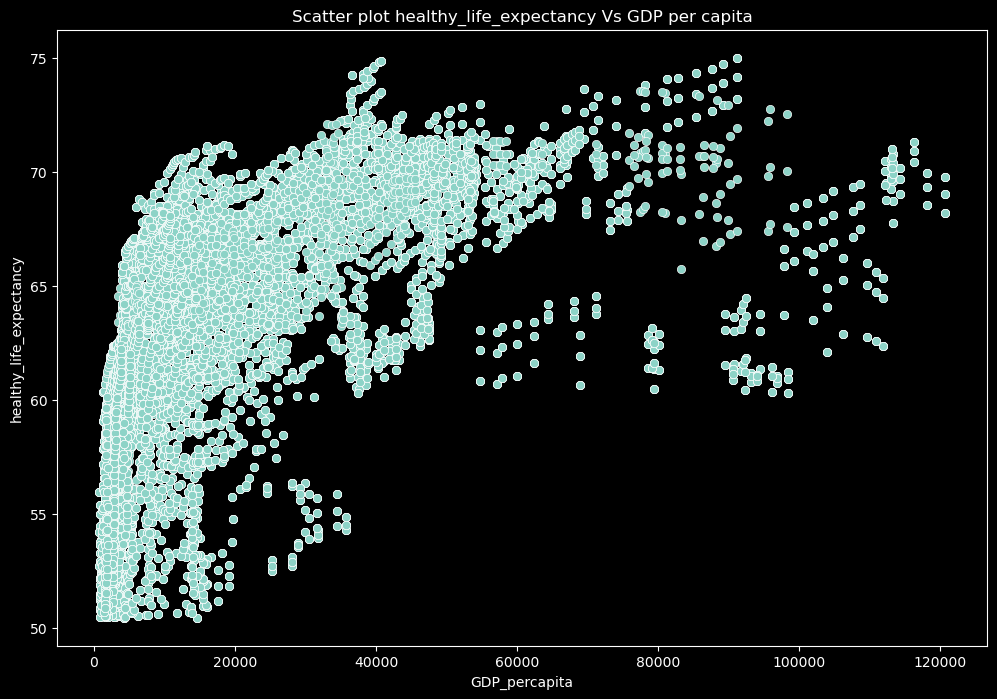

In [83]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(y=combine['healthy_life_expectancy'],x=combine['GDP_percapita'],data=combine,palette='magma')
ax.set_title('Scatter plot healthy_life_expectancy Vs GDP per capita')

Have postive correlation

In [84]:
# Add a new column called Status based on BMI weight.

In [85]:
# delete all null values in BMI
combine = combine.dropna(subset = ['BMI'])
combine.head(2)

country   sex  year  healthy_life_expectancy  life_expectancy  \
0  Thailand  Male  2000                60.063539        67.996728   
1  Thailand  Male  2000                60.063539        67.996728   

           incomegroup           region   BMI    entity Code  GDP_percapita  
0  Upper-middle-income  South-East Asia  22.9  Thailand  THA      9791.8955  
1  Upper-middle-income  South-East Asia  23.5  Thailand  THA      9791.8955

In [86]:
def categorize_bmi(BMI):
    
    if BMI < 18.5:
        return 'Underweight'
    elif 18.5 <= BMI <= 24.9:
        return 'Healthy'
    elif 25.0 <= BMI <= 29.9:
        return 'Overweight'
    elif BMI >= 30:
        return 'Obesity'
    else:
        return 'No data'

# Create a new 'status' column 
combine['status'] = combine['BMI'].apply(categorize_bmi)
combine

country     sex  year  healthy_life_expectancy  \
0                   Thailand    Male  2000                60.063539   
1                   Thailand    Male  2000                60.063539   
2                   Thailand    Male  2000                60.063539   
3                   Thailand  Female  2000                65.638144   
4                   Thailand  Female  2000                65.638144   
...                      ...     ...   ...                      ...   
29575  Saint Kitts and Nevis  Female  2016                65.381614   
29576  Saint Kitts and Nevis  Female  2016                65.381614   
29577  Saint Kitts and Nevis    Both  2016                63.105159   
29578  Saint Kitts and Nevis    Both  2016                63.105159   
29579  Saint Kitts and Nevis    Both  2016                63.105159   

       life_expectancy          incomegroup           region   BMI  \
0            67.996728  Upper-middle-income  South-East Asia  22.9   
1            67.996728  Upper-middle-income  South-East Asia  23.5   
2            67.996728  Upper-middle-income  South-East Asia  22.3   
3            75.782978  Upper-middle-income  South-East Asia  22.9   
4            75.782978  Upper-middle-income  South-East Asia  23.5   
...                ...                  ...              ...   ...   
29575        75.593772                  NaN         Americas  30.7   
29576        75.593772                  NaN         Americas  28.2   
29577        72.065157                  NaN         Americas  29.5   
29578        72.065157                  NaN         Americas  30.7   
29579        72.065157                  NaN         Americas  28.2   

                      entity Code  GDP_percapita      status  
0                   Thailand  THA      9791.8955     Healthy  
1                   Thailand  THA      9791.8955     Healthy  
2                   Thailand  THA      9791.8955     Healthy  
3                   Thailand  THA      9791.8955     Healthy  
4                   Thailand  THA      9791.8955     Healthy  
...                      ...  ...            ...         ...  
29575  Saint Kitts and Nevis  KNA     29329.4790     Obesity  
29576  Saint Kitts and Nevis  KNA     29329.4790  Overweight  
29577  Saint Kitts and Nevis  KNA     29329.4790  Overweight  
29578  Saint Kitts and Nevis  KNA     29329.4790     Obesity  
29579  Saint Kitts and Nevis  KNA     29329.4790  Overweight  

[24368 rows x 12 columns]

In [87]:
#checking if i have any underweight
combine.loc[combine['BMI']<18.5]

Empty DataFrame
Columns: [country, sex, year, healthy_life_expectancy, life_expectancy, incomegroup, region, BMI, entity, Code, GDP_percapita, status]
Index: []

There is no people who is underweight.From the scatter graph, people whose BMI status is healthy, has higher healthy life expectancy and people who is obesed has lower healthy life expectancy.

In [89]:
# Looking healthy life expectancy by GDP by status

Text(0.5, 1.0, 'Scatter plot healthy_life_expectancy Vs GDP by status')

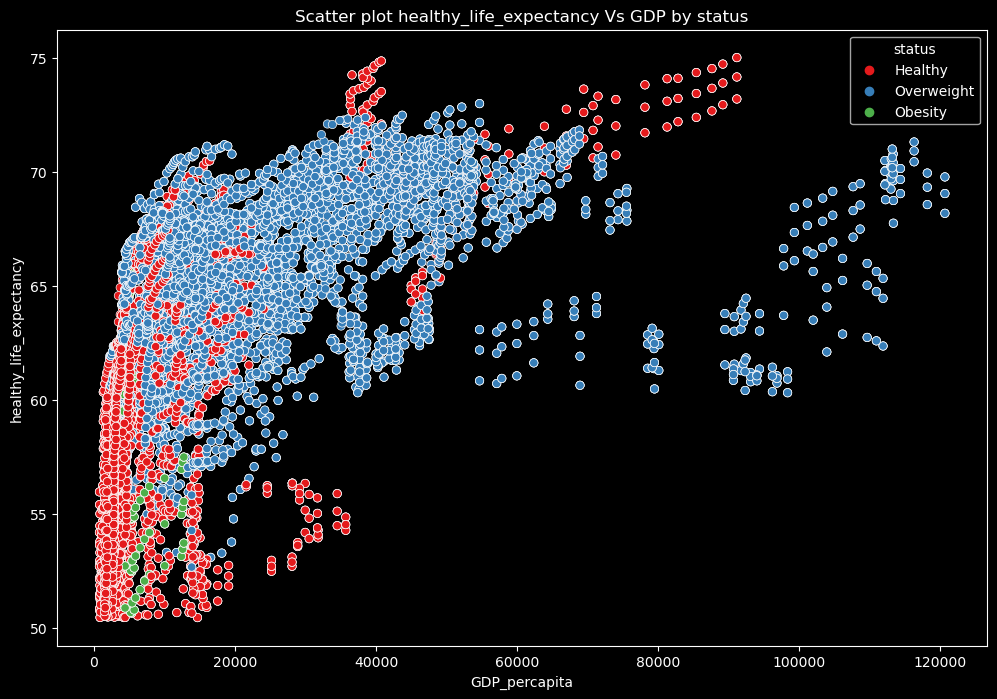

In [90]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(y=combine['healthy_life_expectancy'],x=combine['GDP_percapita'],data=combine,palette='Set1',hue = 'status')
ax.set_title('Scatter plot healthy_life_expectancy Vs GDP by status')

As gdp per capita increase the healthy life expectancy increases.

In [91]:
combine.head(2)

country   sex  year  healthy_life_expectancy  life_expectancy  \
0  Thailand  Male  2000                60.063539        67.996728   
1  Thailand  Male  2000                60.063539        67.996728   

           incomegroup           region   BMI    entity Code  GDP_percapita  \
0  Upper-middle-income  South-East Asia  22.9  Thailand  THA      9791.8955   
1  Upper-middle-income  South-East Asia  23.5  Thailand  THA      9791.8955   

    status  
0  Healthy  
1  Healthy

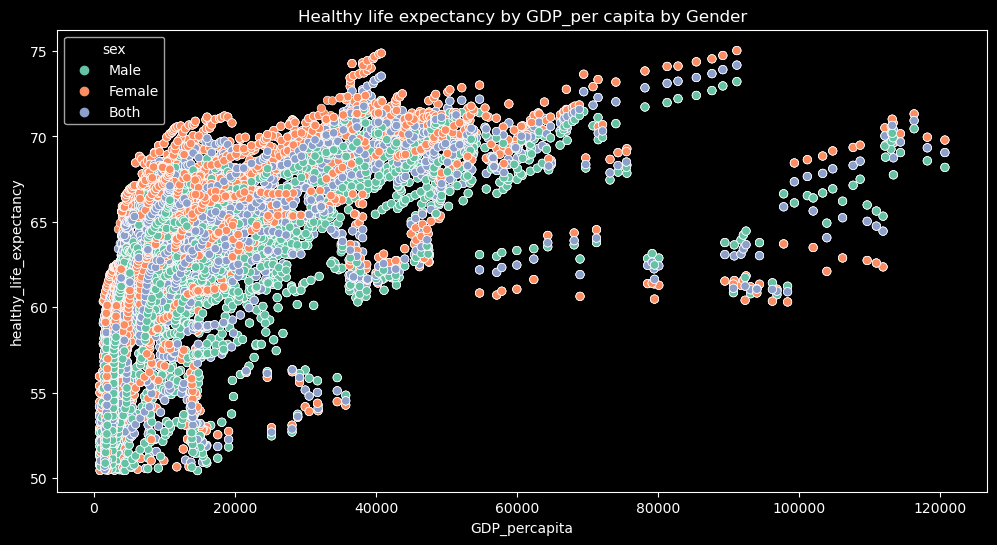

In [92]:
plt.figure(figsize=(12,6))
ax = sns.scatterplot(x=combine['GDP_percapita'],y=combine['healthy_life_expectancy'],data=combine,palette='Set2',hue='sex')
ax.set_title('Healthy life expectancy by GDP_per capita by Gender');

In [93]:
combine = combine.rename(columns ={'country':'Country','sex':'Sex','year':'Year','incomegroup':'IncomeGroup',
                         'healthy_life_expectancy':'Healthy life expectancy','entity':'Entity',
                         'life_expectancy':'Life expectancy','region':'Region','status':'Status','GDP_percapita':'GDP percapita'})

In [94]:
combine.head(2)

Country   Sex  Year  Healthy life expectancy  Life expectancy  \
0  Thailand  Male  2000                60.063539        67.996728   
1  Thailand  Male  2000                60.063539        67.996728   

           IncomeGroup           Region   BMI    Entity Code  GDP percapita  \
0  Upper-middle-income  South-East Asia  22.9  Thailand  THA      9791.8955   
1  Upper-middle-income  South-East Asia  23.5  Thailand  THA      9791.8955   

    Status  
0  Healthy  
1  Healthy

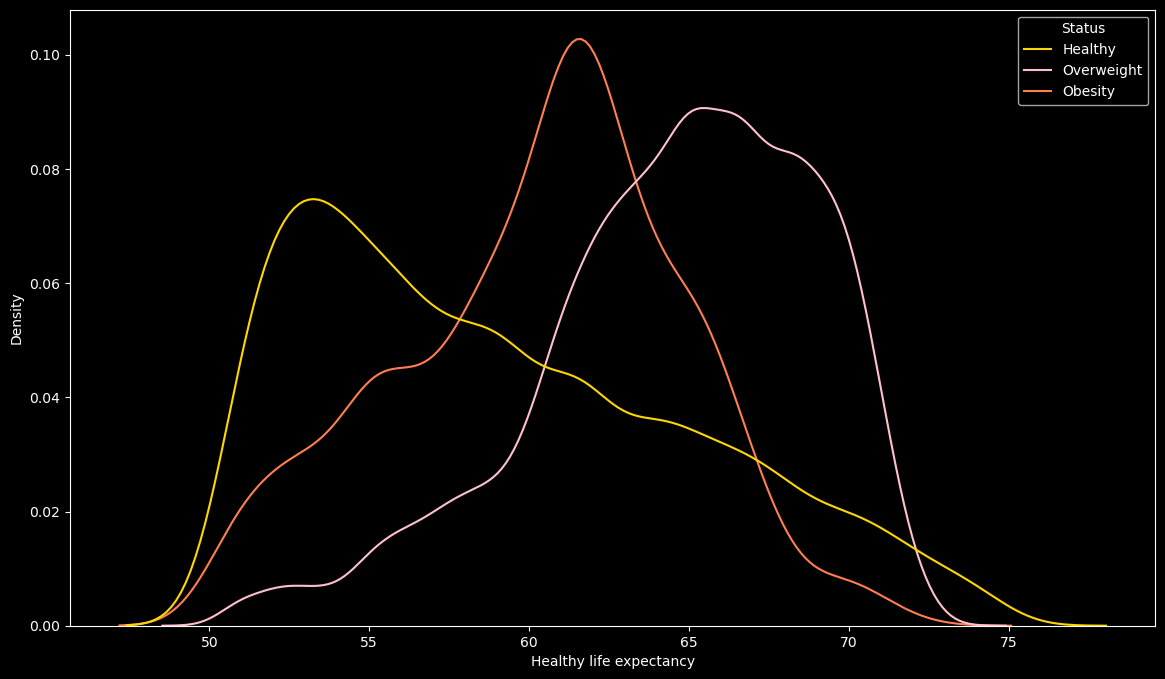

In [95]:
fig = plt.figure(figsize=(14, 8))
sns.kdeplot(data = combine,x= 'Healthy life expectancy',hue = 'Status', common_norm = False, palette=['Gold','Pink','Coral'])

plt.show()

In [96]:
combine.Country.unique()

array(['Thailand', 'Timor-Leste', 'Viet Nam', 'Fiji', 'Mongolia',
       'Tajikistan', 'Turkmenistan', 'Uzbekistan', 'Estonia', 'Latvia',
       'Cambodia', 'Lithuania', 'Republic of Moldova',
       'Russian Federation', 'Denmark', 'Finland', 'France', 'Germany',
       'Greece', 'Indonesia', "Lao People's Democratic Republic",
       'Solomon Islands', 'Tonga', 'China',
       "Democratic People's Republic of Korea", 'Kiribati',
       'Marshall Islands', 'Iceland', 'Uruguay', 'Canada', 'Malaysia',
       'Maldives', 'Myanmar', 'Vanuatu', 'Hungary',
       'Micronesia (Federated States of)', 'Papua New Guinea', 'Samoa',
       'Albania', 'United States of America', 'Trinidad and Tobago',
       'Bolivia (Plurinational State of)', 'North Macedonia',
       'Montenegro', 'Poland', 'Romania', 'Republic of Korea',
       'Philippines', 'Sri Lanka', 'Armenia', 'Azerbaijan', 'Ecuador',
       'Peru', 'Algeria', 'Bahrain', 'Bosnia and Herzegovina', 'Bulgaria',
       'Croatia', 'Czechia', '

In [97]:
combine.to_csv('../data/capstone.csv', index = False)

In [98]:
data1 = combine.to_csv('../data/capstone.csv', index = False)
data1

In [99]:
combine

Country     Sex  Year  Healthy life expectancy  \
0                   Thailand    Male  2000                60.063539   
1                   Thailand    Male  2000                60.063539   
2                   Thailand    Male  2000                60.063539   
3                   Thailand  Female  2000                65.638144   
4                   Thailand  Female  2000                65.638144   
...                      ...     ...   ...                      ...   
29575  Saint Kitts and Nevis  Female  2016                65.381614   
29576  Saint Kitts and Nevis  Female  2016                65.381614   
29577  Saint Kitts and Nevis    Both  2016                63.105159   
29578  Saint Kitts and Nevis    Both  2016                63.105159   
29579  Saint Kitts and Nevis    Both  2016                63.105159   

       Life expectancy          IncomeGroup           Region   BMI  \
0            67.996728  Upper-middle-income  South-East Asia  22.9   
1            67.996728  Upper-middle-income  South-East Asia  23.5   
2            67.996728  Upper-middle-income  South-East Asia  22.3   
3            75.782978  Upper-middle-income  South-East Asia  22.9   
4            75.782978  Upper-middle-income  South-East Asia  23.5   
...                ...                  ...              ...   ...   
29575        75.593772                  NaN         Americas  30.7   
29576        75.593772                  NaN         Americas  28.2   
29577        72.065157                  NaN         Americas  29.5   
29578        72.065157                  NaN         Americas  30.7   
29579        72.065157                  NaN         Americas  28.2   

                      Entity Code  GDP percapita      Status  
0                   Thailand  THA      9791.8955     Healthy  
1                   Thailand  THA      9791.8955     Healthy  
2                   Thailand  THA      9791.8955     Healthy  
3                   Thailand  THA      9791.8955     Healthy  
4                   Thailand  THA      9791.8955     Healthy  
...                      ...  ...            ...         ...  
29575  Saint Kitts and Nevis  KNA     29329.4790     Obesity  
29576  Saint Kitts and Nevis  KNA     29329.4790  Overweight  
29577  Saint Kitts and Nevis  KNA     29329.4790  Overweight  
29578  Saint Kitts and Nevis  KNA     29329.4790     Obesity  
29579  Saint Kitts and Nevis  KNA     29329.4790  Overweight  

[24368 rows x 12 columns]